# Face mask detection (image processing) with Tensorflow/Keras

This is the second part of facemask detection project. In the first part, we built and saved facemask detection ImageNet model with Tensorflow/ Keras which was trained on face images. Now in this part, we are first detecting face boundaries in the image and then applying facemask detection model from part 1.  
In the third part, we will use facemask detection on video content.

In [2]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import cv2
import os


In [3]:
face_cascade = cv2.CascadeClassifier('/Users/ketki.potdar/opencv/data/haarcascades/haarcascade_frontalface_default.xml')

We are using pretrained OpenCV deep model to detect face in the image. And then we are loading 'tf_model' we trained in part 1.

In [ ]:
# !wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
# !wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

In [4]:
prototxt = 'deploy.prototxt'
weights = 'res10_300x300_ssd_iter_140000.caffemodel'
face_dnn = cv2.dnn.readNetFromCaffe(prototxt, weights)

In [5]:
model = load_model('tf_model')

In [8]:
#img1 = cv2.imread('test.jpg')
#gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
#faces = face_cascade.detectMultiScale(gray, 1.1, 4)
#for (x, y, w, h) in faces:
#    cv2.rectangle(img1, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Display the output
#cv2.imshow('img', img)
#cv2.waitKey()

I tried testin the model with couple of images - my image without mask and other random image with mask (image source - https://www.businessinsider.com/face-mask-sale-price-using-facebook-instagram-advertise-2020-3). The model was correctly able to identify face and able to detect if the person was wearing mask or not.  
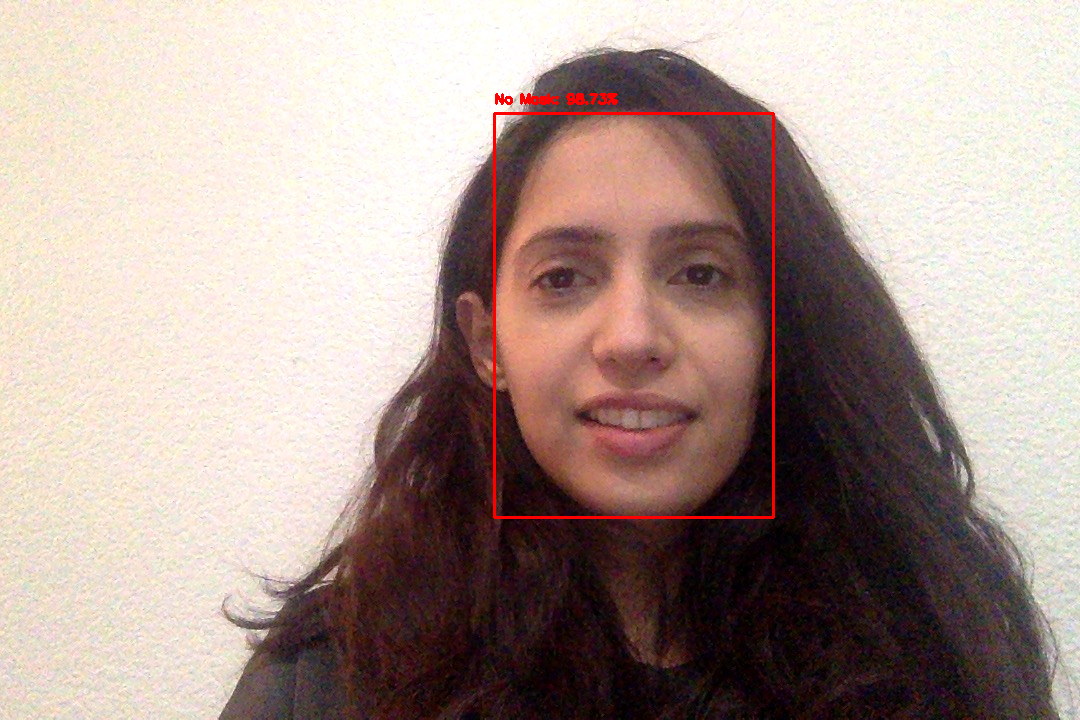
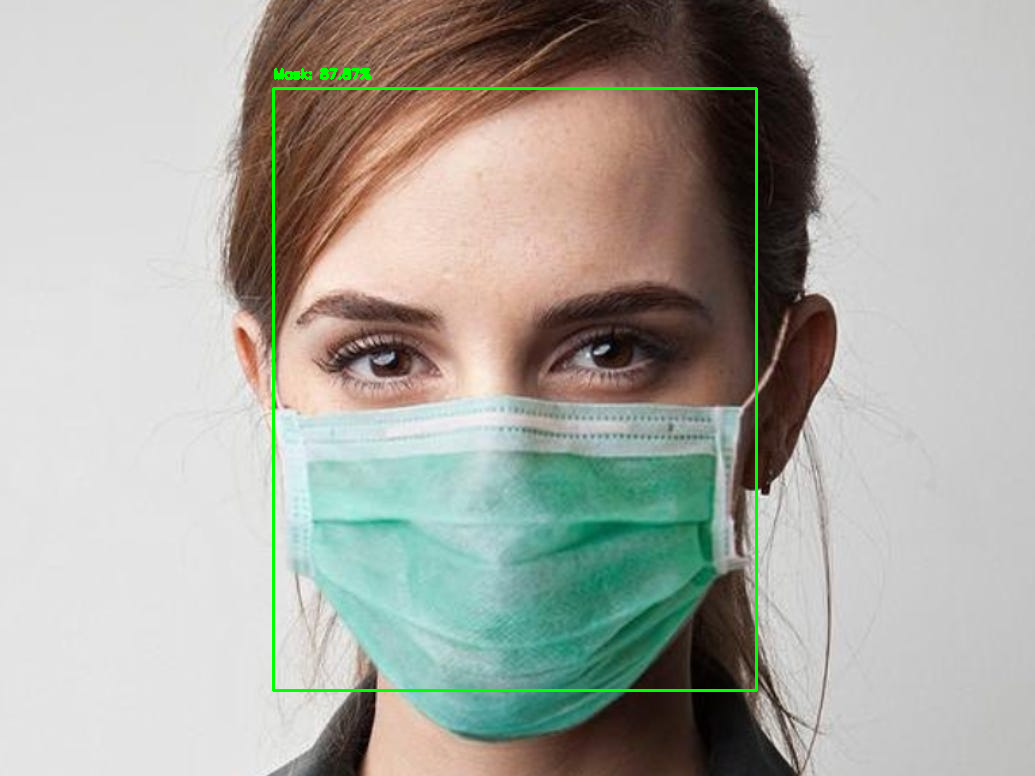

In [6]:
image = cv2.imread('test1.jpg')
orig = image.copy()
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104.0, 177.0, 123.0))
face_dnn.setInput(blob)
detections = face_dnn.forward()

In [8]:
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        face = image[startY:endY, startX:endX]
        face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        face = cv2.resize(face, (224, 224))
        face = img_to_array(face)
        face = preprocess_input(face)
        face = np.expand_dims(face, axis=0)
        (withoutMask, mask) = model.predict(face)[0]
        label = "Mask" if mask > withoutMask else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
        label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
        cv2.putText(image, label, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
        cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)

(1, 224, 224, 3)


In [ ]:
cv2.imshow("Output", image)
cv2.waitKey(0)
cv2.destroyAllWindows()